# Instacart Market Analysis

The goal of this analysis is to explore the datasets and identify customer trends based on purchasing habits 

Part 1:

Step 1: importing the data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
orders = pd.read_csv('../instacart_orders.csv', sep=';')
products = pd.read_csv('../products.csv', sep=';')
aisles = pd.read_csv('../aisles.csv', sep=';')
departments = pd.read_csv('../departments.csv', sep=';')
order_products = pd.read_csv('../order_products.csv', sep=';')

Step 2: Data Exploration

In [37]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [40]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Step 3: Data Clean-up

Orders dataset 

In [42]:
orders.duplicated().sum()

15

In [43]:
# Check for all orders placed Wednesday at 2:00 AM 
# Assuming that 0 = Sunday
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [44]:
orders = orders.drop_duplicates()

In [45]:
orders.duplicated().sum()

0

In [46]:
orders['order_id'].duplicated().sum()

0

Products dataset

In [47]:
products.duplicated().sum()

0

In [48]:
products['product_id'].duplicated().sum()

0

In [49]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()

1361

In [50]:
products[products['product_name'].str.lower().duplicated(keep=False)].sort_values('product_name').head(10)

,product_id,product_name,aisle_id,department_id
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
13152,13153,Aged Balsamic Vinegar of Modena,19,13
22582,22583,Albacore Solid White Tuna In Water,95,15
24830,24831,Albacore Solid White Tuna in Water,95,15
515,516,American Cheese Slices,21,16
9037,9038,American Cheese slices,21,16
49530,49531,Anchovy Fillets In Olive Oil,95,15
12325,12326,Anchovy Fillets in Olive Oil,95,15


Departments Dataset

In [51]:
departments.duplicated().sum()

0

In [52]:
departments['department_id'].duplicated().sum()

0

Aisles Dataset

In [53]:
aisles.duplicated().sum()

0

In [54]:
aisles['aisle_id'].duplicated().sum()

0

Order_products dataset

In [55]:
order_products.duplicated().sum()

0

In [56]:
order_products[['order_id', 'product_id']].duplicated().sum()

0

Orders dataset

In [57]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [58]:
# Are there any missing values where it's not a customer's first order?
orders[orders['days_since_prior_order'].isnull() & (orders['order_number'] > 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Products dataset

In [59]:
products.info()
# Check the null value count
products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [60]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isnull()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

In [61]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isnull()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

In [62]:
# What is this ailse and department?
display(aisles[aisles['aisle_id'] == 100])
display(departments[departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [63]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
# Double check the null values
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Order_products dataset

In [64]:
order_products.info(show_counts=True)

order_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [65]:
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(1.0, 64.0)

In [66]:
missing_cart_order = order_products[order_products['add_to_cart_order'].isnull()]['order_id']

In [67]:
display(order_products[order_products['order_id'].isin(missing_cart_order)]['order_id'].value_counts().head(10))
order_products[order_products['order_id'].isin(missing_cart_order)]['order_id'].value_counts().min()

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
1730767     95
102236      95
1800005     92
2926893     92
1386261     91
Name: count, dtype: int64

65

In [68]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
# Double check the total null values
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

# Conclusion

During the data cleaning process, I addressed several data quality issues.

First, I eliminated duplicate entries, removing 15 duplicates from the orders dataframe and 1,361 duplicates from the products dataframe (this was done after standardizing the product_name column format). 

I then handled missing values across both datasets: in the products dataframe, I filled 1,258 missing entries with the string 'unknown', while in the orders dataframe, we replaced 28,819 missing values with the integer 999.

Part 2:

# Data Exploration

[A] Easy

A1. Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).

In [69]:
orders['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

In [70]:
orders['order_dow'].value_counts().sort_index()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64

A2. Create a plot that shows how many people place orders for each hour of the day.


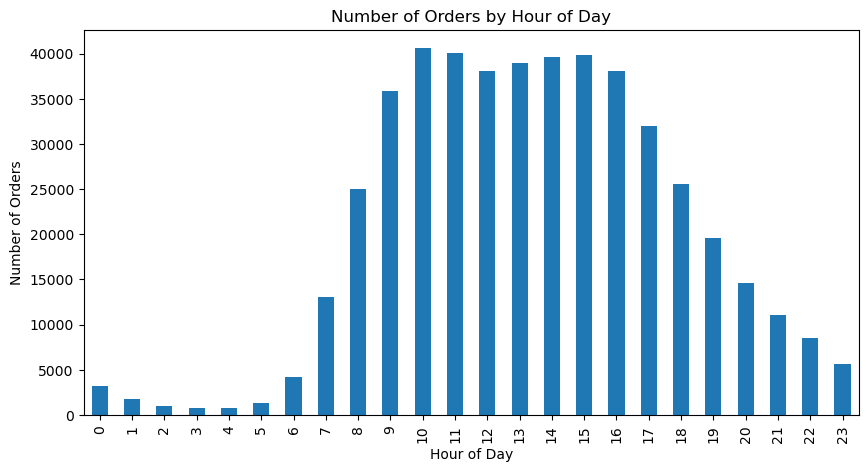

In [71]:
orders['order_hour_of_day'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')
plt.show()

As can be seen the most popular time to shop for groceries is between 10am and 4pm. While overnight people rarely order.

A3. Create a plot that shows what day of the week people shop for groceries.

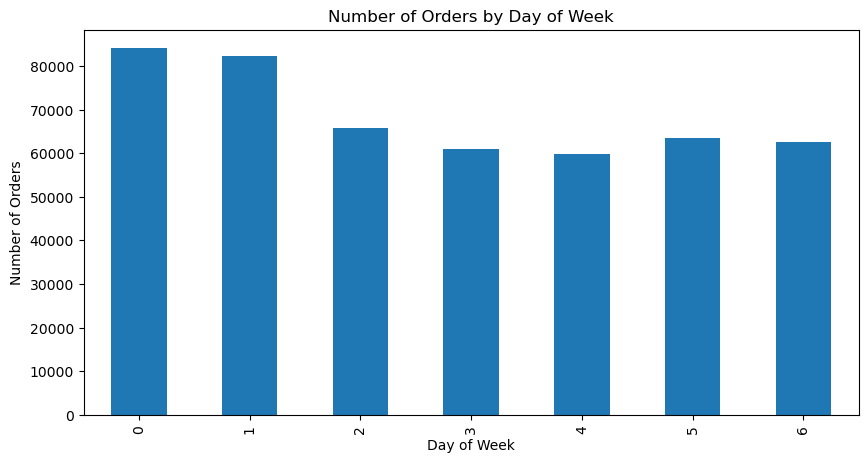

In [72]:
orders['order_dow'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.show()

As can be seen the most popular days to shop for groceries is Sunday and Monday. While Wednesday and Thursday are the least popular days to shop for groceries.

A4. Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.

In [73]:
orders['days_since_prior_order'].min(), orders['days_since_prior_order'].max(), orders['days_since_prior_order'].mean()

(0.0, 30.0, 11.101813900274362)

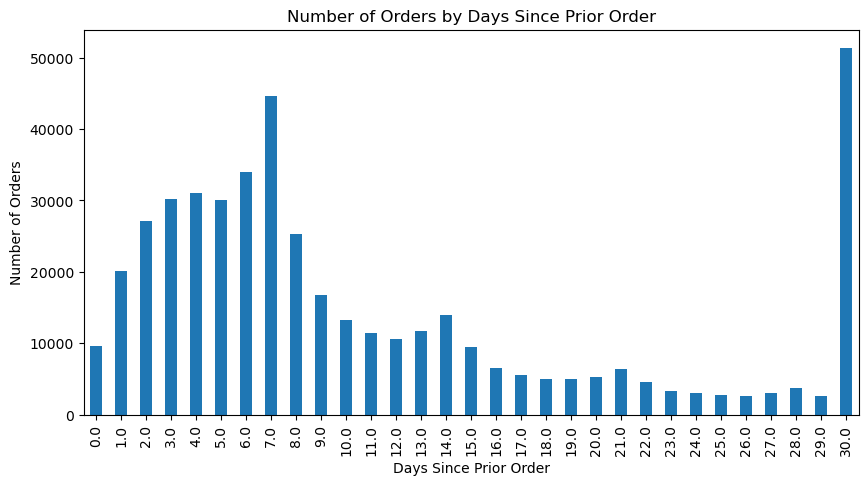

In [74]:
orders['days_since_prior_order'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Days Since Prior Order')
plt.show()

As can be seen many customers wait 7 days or less before placing another order. While some customers wait longer.
After calculating we can see that the average customer wait time is about 11 days to reorder.

[B] Medium

B1. Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.

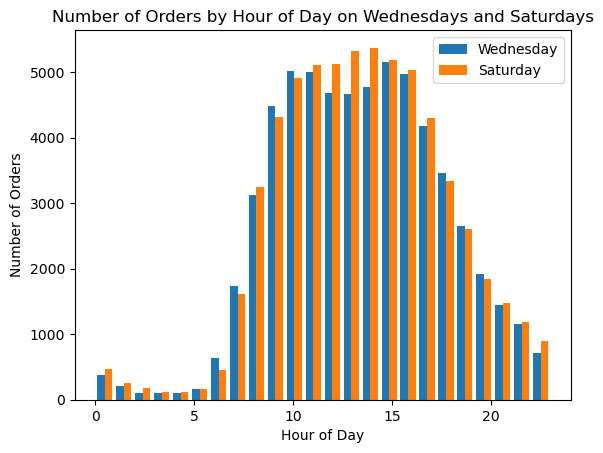

In [75]:
b, bins, patches = plt.hist(
    [orders[orders['order_dow'] == 3]['order_hour_of_day'], orders[orders['order_dow'] == 6]['order_hour_of_day']],
    bins = 24,
    label = ['Wednesday', 'Saturday'],
)
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day on Wednesdays and Saturdays')
plt.show()

It seems the number of orders are about the same. The only difference is about noon on Saturday orders are increased.

B2. Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)

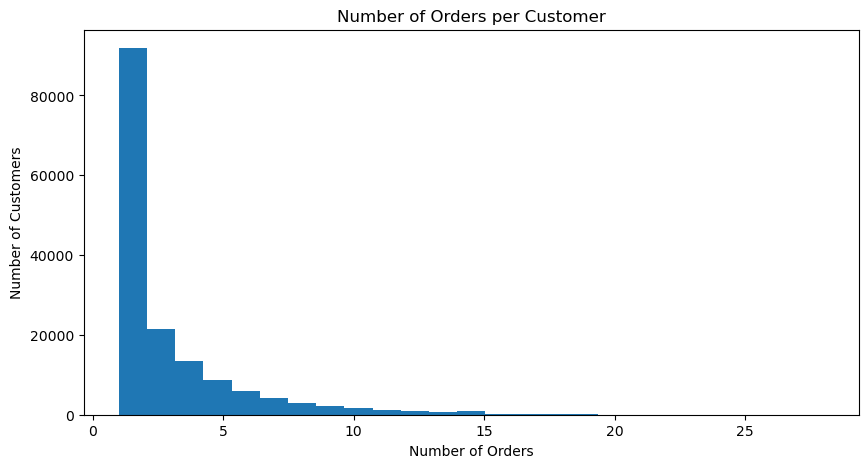

In [76]:
orders.groupby('user_id')['order_id'].nunique().plot.hist(bins = 25, figsize = (10, 5))
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Number of Orders per Customer')
plt.show()

In [77]:
display(orders.groupby('user_id')['order_number'].max().value_counts().head(5))
display(orders.groupby('user_id')['order_number'].max().mean())

order_number
4    12368
3    10510
5    10406
6     9194
2     9113
Name: count, dtype: int64

15.577570710824013

As shown, the distribution for the number of orders per customers is skewed to the right. Where the top 5 orders per customer is 4, 3, 5, 6, and 2. After that the number of orders per customer starts to increase all the way to 100. We can also determind after calculating that the average number of orders per customer is 15.

B3. What are the top 20 products that are ordered most frequently (display their id and name)?

In [78]:
merged_products = pd.merge(order_products, products, on = 'product_id', how = 'left')
merged_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [79]:
merged_products.groupby(['product_name', 'product_id'])['product_name'].count().sort_values(ascending = False).head(20)

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: product_name, dtype: int64

It can be determined from looking at the top 20 popular products that the top 5 products are bananas, bag of organic bananas, organic strawberries, organic baby spinach, and organic hass avocado. After that the top 20 products are a mix of fruits and vegetables.